# HI Survey

This tutorial goes through the data reduction of position switched observations of the 21 cm HI line. The data used for this tutorial is part of the [New Reference Catalog of Extragalactic HI Observations
](https://greenbankobservatory.org/~koneil/HIsurvey/index.shtml) by [Karen O'Neil](https://greenbankobservatory.org/~koneil/). For more details about how the observations were set up, please refer to the [GBTdocs HI Position Switched (psw) Spectrum tutorial](https://gbtdocs.readthedocs.io/en/latest/tutorials/hi_psw_tutorial.html#) or the [survey article](https://greenbankobservatory.org/~koneil/paps/HIsurvey.html).

Some basic information about the observations. The observations use position switching, and in some cases, the data is recorded without firing a noise diode, so that it is not possible to derive a system temperature from those records alone. In those cases, we will use observations close in time when the noise diodes where fired.

## Loading Modules
We start by loading the modules we will use for the data reduction. 

For display purposes, we use the static (non-interactive) matplotlib backend in this tutorial. However, you can tell `matplotlib` to use the `ipympl` backend to enable interactive plots. This is only needed if working on jupyter lab or notebook.

In [1]:
# Set interactive plots in jupyter.
#%matplotlib ipympl

# These are required for the data reduction.
from dysh.fits.gbtfitsload import GBTFITSLoad
from astropy import units as u

# These ones are only used to download the data.
from pathlib import Path
from dysh.util.download import from_url

## Data Retrieval

Download the example SDFITS data, if necessary.

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/hi-survey/data/AGBT04A_008_02.raw.acs/AGBT04A_008_02.raw.acs.fits"
savepath = Path.cwd() / "data"
filename = from_url(url, savepath)

## Data Loading

Next, we use `GBTFITSLoad` to load the data, and then its `summary` method to inspect its contents.

In [3]:
sdfits = GBTFITSLoad(filename)

In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,220,3C286,0.0,OffOn,1,1.4,1.4,1,2,6,1,185.280583,82.024626
1,221,3C286,0.0,OffOn,2,1.4,1.4,1,2,6,1,187.213578,81.998047
2,222,3C286,0.0,OffOn,1,1.4,1.4,1,2,6,1,193.833116,81.841281
3,223,3C286,0.0,OffOn,2,1.4,1.4,1,2,6,1,195.676641,81.778794
4,224,3C286,0.0,OffOn,1,1.4,1.4,1,2,6,1,195.518231,80.291009
5,225,3C286,0.0,OffOn,2,1.4,1.4,1,2,5,1,199.935766,81.600451
6,226,3C286,0.0,OffOn,1,1.4,1.4,1,2,6,1,200.833322,80.026463
7,227,3C286,0.0,OffOn,2,1.4,1.4,1,2,6,1,205.94706,81.260862
8,228,B1328+254,0.0,OffOn,1,1.4,1.4,1,2,6,1,207.52569,73.984375
9,229,B1328+254,0.0,OffOn,2,1.4,1.4,1,2,6,1,210.959989,75.158373


There is a total of 81 scans in this data set, all used a single spectral window (IF), two polarizations (PLNUM), and a single feed (FDNUM).

## Data Reduction

### Single On/Off Pair
We will start by reducing data for a single pair of position switched scans, which used the noise diodes. We will use scan 270. First, we calibrate the data for a single polarization, `plnum=0`. We use the `getps` method of `GBTFITLoad`, which returns a `ScanBlock`. Since we are calibrating a single pair of position switched scans, the use of a `ScanBlock` won't be evident, but we will see it when we calibrate multiple pairs of observations.

In [5]:
pssb0 = sdfits.getps(scan=270, plnum=0, ifnum=0, fdnum=0)
pssb0

ScanBlock([<dysh.spectra.scan.PSScan at 0x7fb953c3d7b0>])

The return is a `ScanBlock` with a single `PSScan` in it. We can extract information from the observations by querying the different attributes of the `PSScan`, like the system temperature in K (`tsys`), or exposure time in seconds (`exposure`).

In [6]:
pssb0[0].tsys

array([27.17371015, 27.18010156, 27.19215288, 27.16457608, 27.18220045,
       27.18888432, 27.17167504, 27.16475662, 27.15403792, 27.18787308,
       27.1865592 , 27.18108986, 27.16961161, 27.17581517, 27.17490008,
       27.17325784, 27.17196806, 27.17202806, 27.21359808, 27.18930318,
       27.18091661, 27.16828651, 27.17083338, 27.17112253, 27.17606212,
       27.17459134, 27.17332393, 27.21278453, 27.17397878, 27.17012782])

In [7]:
pssb0[0].exposure

array([4.77948809, 4.77948809, 4.77948809, 4.77948809, 4.77948809,
       4.77948809, 4.77948809, 4.77948809, 4.77948809, 4.77948797,
       4.77948809, 4.77948809, 4.77948809, 4.77948809, 4.77948809,
       4.77948809, 4.77948809, 4.77948809, 4.77948785, 4.77948809,
       4.77948809, 4.77948809, 4.77948809, 4.77948809, 4.77948809,
       4.77948809, 4.77948809, 4.77948797, 4.77948797, 4.77948809])

In [8]:
pssb0[0].scan

271

In [9]:
pssb0[0].plnum

0

In [10]:
pssb0[0].ifnum

0

Notice that the `PSScan` says it has a scan number (`scan`) of 271. This is because `dysh` can tell that the on-source observation has a scan number of 271, and the off-source observation is in scan 270.

#### Inspecting Individual Integrations

If we want to have a look at the calibrated data, integration by integration, we can use the `_calibrated` attribute of the `PSScan`. This returns an array with rows corresponding to the integrations, and columns to the channel number.

In [11]:
pssb0[0]._calibrated

masked_array(
  data=[[-50.41327667236328, -17.35414695739746, 59.479190826416016, ...,
         -0.05627469718456268, 0.06515730917453766, 0.5484910011291504],
        [24.405393600463867, -32.876129150390625, -0.19761665165424347,
         ..., 0.2878355383872986, 0.6664587259292603, 1.7173004150390625],
        [1.0966312885284424, -20.439929962158203, 6.070507526397705, ...,
         0.19782519340515137, 0.959651529788971, 0.35590970516204834],
        ...,
        [47.206546783447266, -28.20340347290039, -23.154296875, ...,
         -0.8864640593528748, -0.3046358525753021, -2.148747205734253],
        [-148.5045623779297, 46.845848083496094, -49.767757415771484,
         ..., 0.025276966392993927, 0.6366174817085266,
         0.460723340511322],
        [-13.19980239868164, 48.671852111816406, -17.70376968383789, ...,
         -0.8527239561080933, -0.537662148475647, 0.19564472138881683]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ...,

We can also retrieve the calibrated integrations as `Spectrum` objects using the `calibrated` method.

In [12]:
pssb0_int0 = pssb0[0].calibrated(0)
pssb0_int0

<Spectrum1D(flux=[-50.41327667236328 ... 0.5484910011291504] K (shape=(32768,), mean=0.00890 K); spectral_axis=<SpectralAxis 
   (observer: <ITRS Coordinate (obstime=2004-04-22T07:08:15.000, location=(0., 0., 0.) km): (x, y, z) in m
                  (882593.9465029, -4924896.36541728, 3943748.74743984)
               (v_x, v_y, v_z) in km / s
                  (0., 0., 0.)>
    target: <SkyCoord (FK5: equinox=J2000.000): (ra, dec, distance) in (deg, deg, kpc)
                (202.68562135, 32.76085866, 1000000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 4676.)>
    observer to target (computed from above):
      radial_velocity=4686.132814909312 km / s
      redshift=0.0157553569969906
    doppler_rest=1420405400.0 Hz
    doppler_convention=optical)
  [1.39229407e+09 1.39229445e+09 1.39229483e+09 ... 1.40479293e+09
 1.40479331e+09 1.40479369e+09] Hz> (length=32768))>

`Spectrum` objects have a variety of methods, such as `plot`, `smooth`, and `baseline`. Here we use `plot` to look a the data.

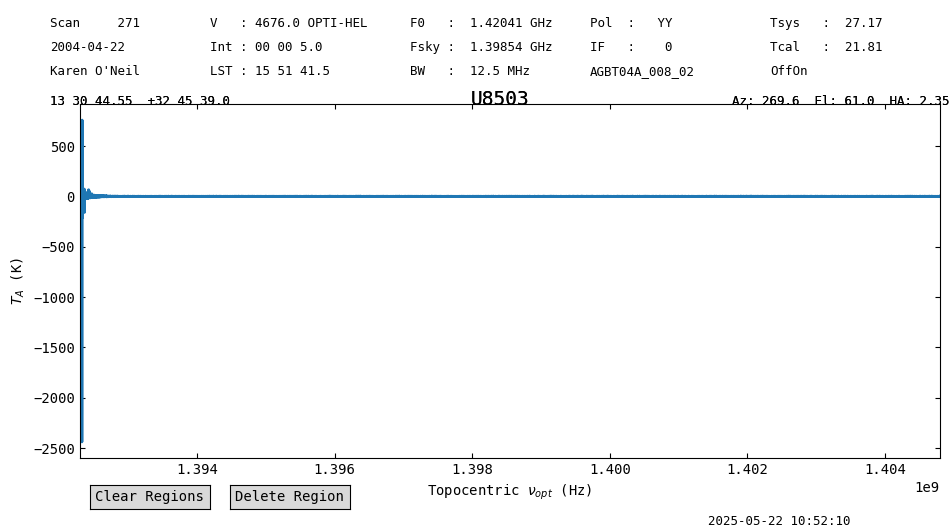

In [13]:
pssb0_int0.plot()

The y-axis can be adjusted during the call to `plot`, through the `ymin` and `ymax` arguments.

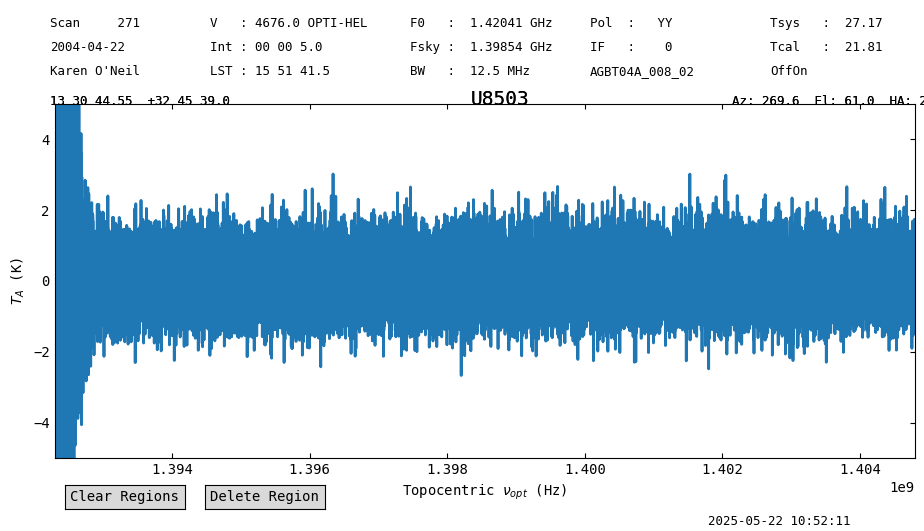

In [14]:
pssb0_int0.plot(ymin=-5, ymax=5)

Since this is a single integration, there's not much to see. Let's work on a time average now.

#### Time Averaging Integrations

Time averaging can be done using the `timeaverage` method of a `Scan` or `ScanBlock`. By default time averaging uses the following weights: 
$$
\frac{T^{2}_{sys}}{\Delta\nu\Delta t}
$$
with $T_{sys}$ the system temperature, $\Delta\nu$ the channel width and $\Delta t$ the integration time. In `dysh` these are set using `weights='tsys'` (the default).

`timeaverage` will return a `Spectrum` object.

In [15]:
ps0_spec = pssb0.timeaverage()
ps0_spec

<Spectrum1D(flux=[-20.559832239193426 ... 0.06326033900588074] K (shape=(32768,), mean=0.15409 K); spectral_axis=<SpectralAxis 
   (observer: <ITRS Coordinate (obstime=2004-04-22T07:08:15.000, location=(0., 0., 0.) km): (x, y, z) in m
                  (882593.9465029, -4924896.36541728, 3943748.74743984)
               (v_x, v_y, v_z) in km / s
                  (0., 0., 0.)>
    target: <SkyCoord (FK5: equinox=J2000.000): (ra, dec, distance) in (deg, deg, kpc)
                (202.68562135, 32.76085866, 1000000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 4676.)>
    observer to target (computed from above):
      radial_velocity=4686.132814909312 km / s
      redshift=0.0157553569969906
    doppler_rest=1420405400.0 Hz
    doppler_convention=optical)
  [1.39229407e+09 1.39229445e+09 1.39229483e+09 ... 1.40479293e+09
 1.40479331e+09 1.40479369e+09] Hz> (length=32768))>

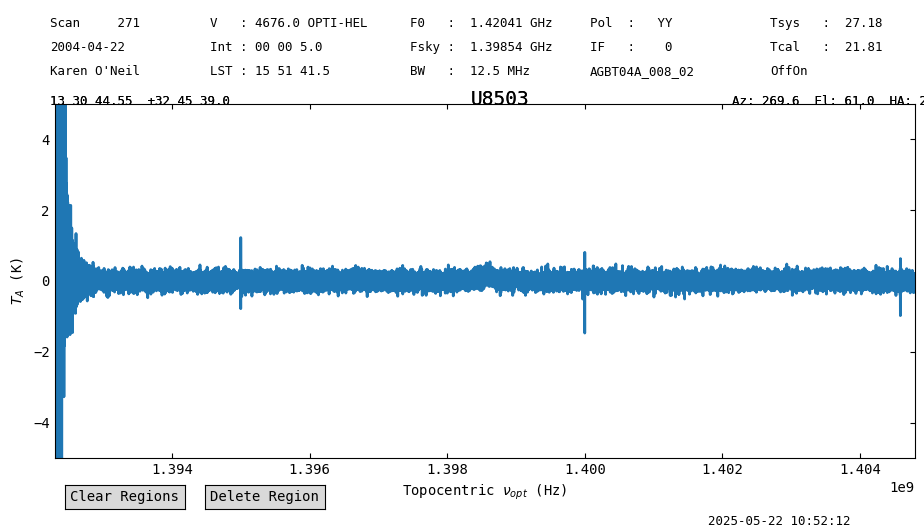

In [16]:
ps0_spec.plot(ymin=-5, ymax=5)

The noise is lower, and there are hints of a signal. Let's smooth the data to further reduce the noise. 

#### Smoothing

Smoothing is done with the `smooth` method. By default it decimates the spectrum, so it only retains independent samples. In this case we smooth using a Gaussian kernel with a width of 16 channels.

In [17]:
ps0_spec_smo = ps0_spec.smooth("gauss", 16)

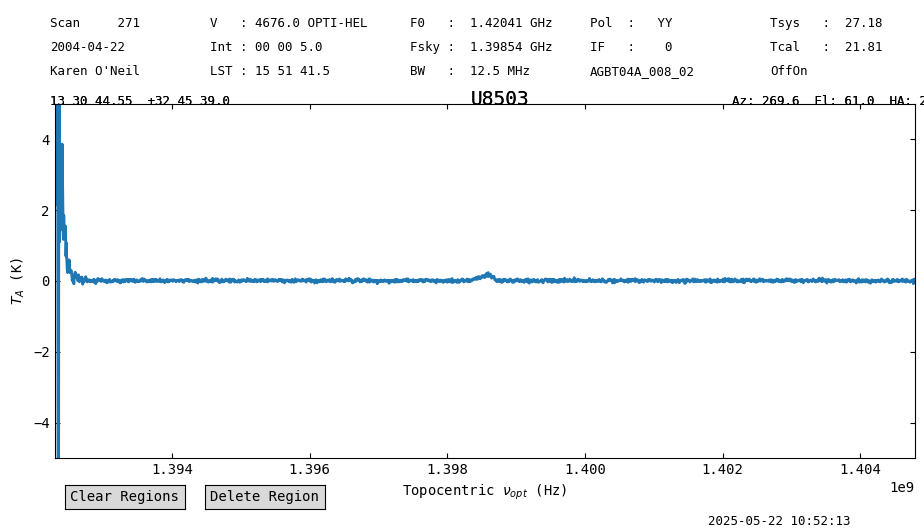

In [18]:
ps0_spec_smo.plot(ymin=-5, ymax=5)

We have to zoom in further to see the signal. We also limit the x-axis range.

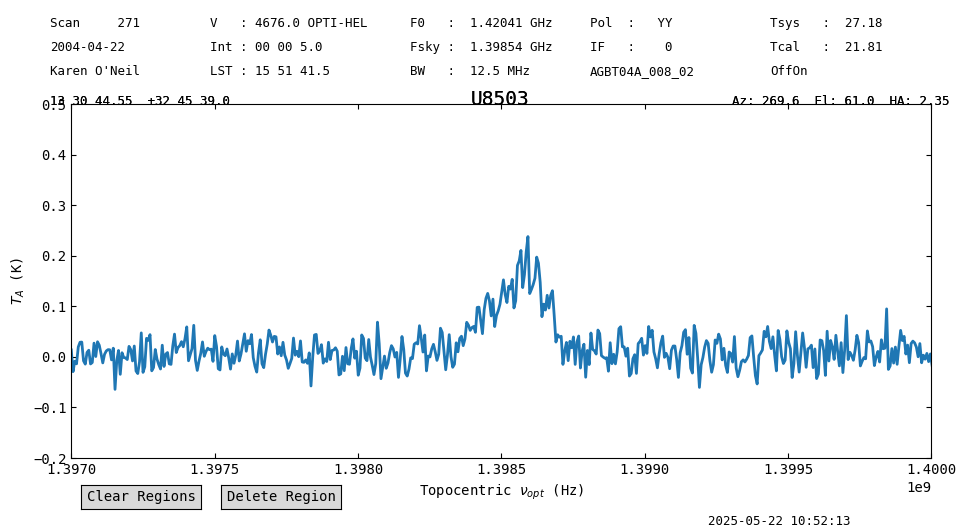

In [19]:
ps0_spec_smo.plot(ymin=-0.2, ymax=0.5, xmin=1.397e9, xmax=1.400e9)

#### Polarization Averaging

While inspecting the data we saw that there are two polarizations. We can average them together to further reduce the noise by a factor $\sqrt{2}$. The second polarization can be calibrated following the above steps, but setting `plnum=1`. Here we also demonstrate the use of chaining to do the data reduction. This refers to using multiple commands in a chain, like

In [20]:
ps1_spec_smo = sdfits.getps(scan=270, plnum=1, ifnum=0, fdnum=0).timeaverage().smooth("gauss", 16)

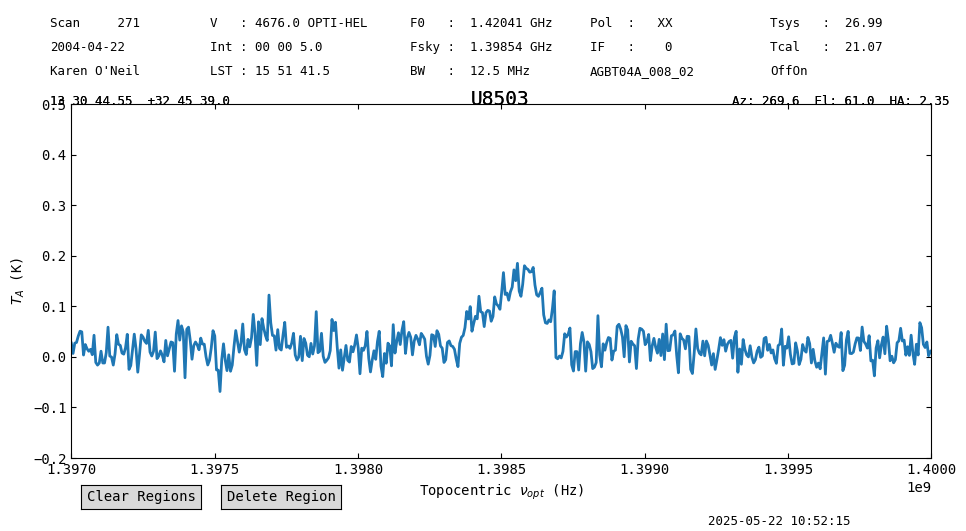

In [21]:
ps1_spec_smo.plot(ymin=-0.2, ymax=0.5, xmin=1.397e9, xmax=1.400e9)

Now we average the smoothed spectra for both polarizations using the `average` method.

In [22]:
ps_spec_smo = ps0_spec_smo.average([ps1_spec_smo])

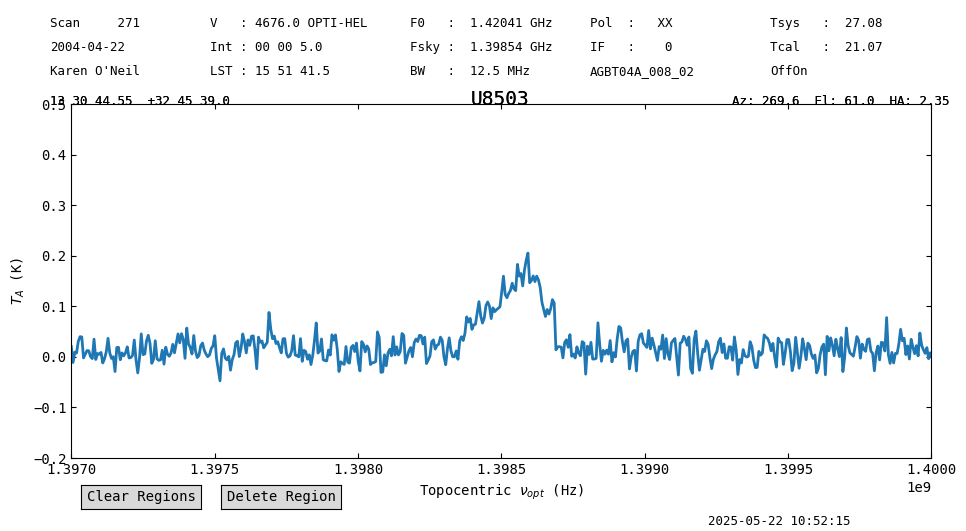

In [23]:
ps_spec_smo.plot(ymin=-0.2, ymax=0.5, xmin=1.397e9, xmax=1.400e9)

#### Statistics

Now we will compare the noise properties of the spectra. For this we leverage the ability to slice spectra. First, we replot the spectra over the whole x-range to find a good frequency range where to compute statistics.

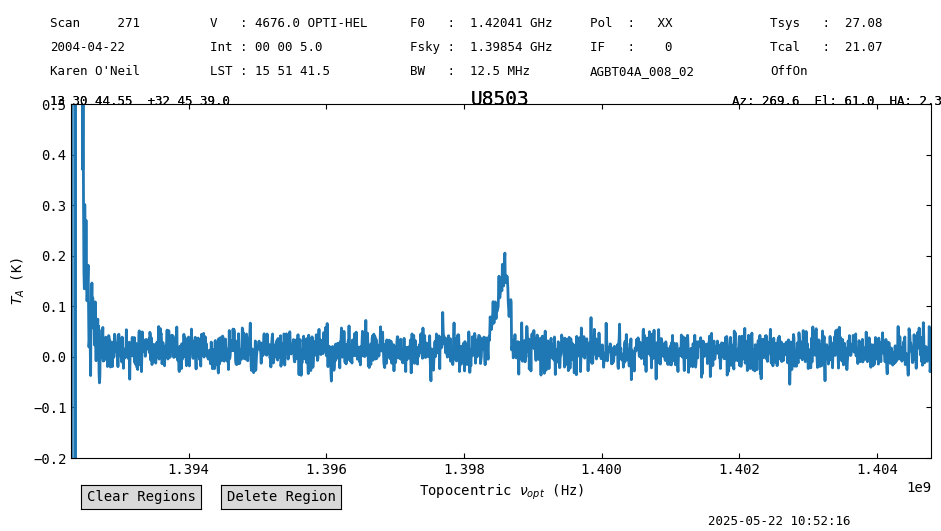

In [24]:
ps_spec_smo.plotter.reset()
ps_spec_smo.plot(ymin=-0.2, ymax=0.5)

We use the range between 1394 MHz and 1398 MHz, and then compute the statistics over this range.

In [25]:
s = slice(1394*u.MHz, 1398*u.MHz)
ps_spec_smo[s].stats()

{'mean': <Quantity 0.0138139 K>,
 'median': <Quantity 0.01388117 K>,
 'rms': <Quantity 0.0202041 K>,
 'min': <Quantity -0.04793606 K>,
 'max': <Quantity 0.0878015 K>}

Now for the individual polarizations.

In [26]:
ps0_spec_smo[s].stats(), ps1_spec_smo[s].stats()

({'mean': <Quantity 0.00952572 K>,
  'median': <Quantity 0.00854112 K>,
  'rms': <Quantity 0.02516344 K>,
  'min': <Quantity -0.07801185 K>,
  'max': <Quantity 0.08209355 K>},
 {'mean': <Quantity 0.01804343 K>,
  'median': <Quantity 0.01677582 K>,
  'rms': <Quantity 0.02622516 K>,
  'min': <Quantity -0.06849154 K>,
  'max': <Quantity 0.12214609 K>})

The individual polarizations had an rms of $\approx0.0255$ K, and the average an rms of $0.02$ K. Thus, the average has a noise a factor of $0.9\sqrt{2}$ lower than the individual polarizations. That is $10\%$ higher than expected.

#### Baseline Subtraction

Now we will subtract a baseline from the averaged spectrum. For this we use the `baseline` method. It is important to use a range of frequencies that will not bias the baseline fit. We exclude the range at the low-frequency end of the spectral window, up to 1394 MHz, and the range that contains the spectral line, between 1398 and 1400 MHz. In this case we use a polynomial of order 1 as our baseline model.

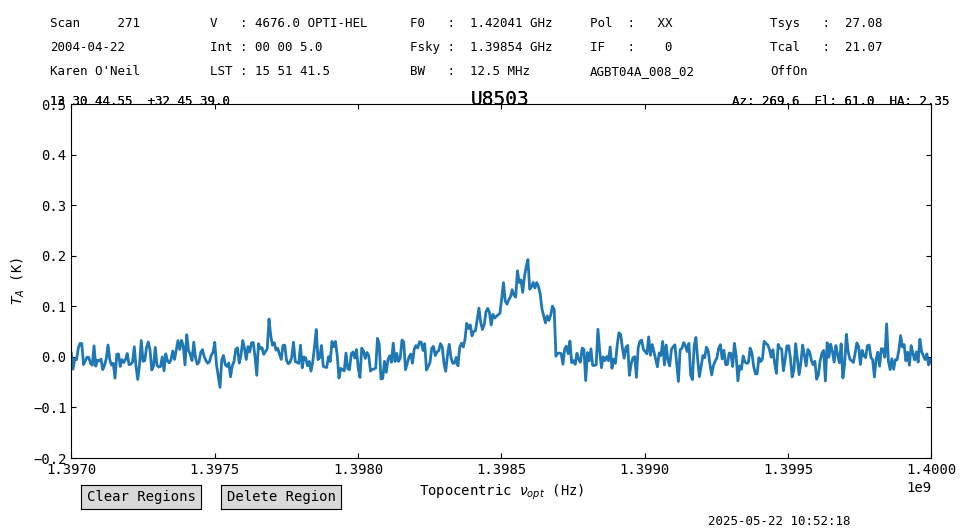

In [27]:
exclude = [(1*u.GHz,1.394*u.GHz),(1.398*u.GHz,1.4*u.GHz)]
ps_spec_smo.baseline(1, model="poly", exclude=exclude, remove=True)
ps_spec_smo.plot(ymin=-0.2, ymax=0.5, xmin=1.397e9, xmax=1.400e9)

In [28]:
ps_spec_smo[s].stats()

{'mean': <Quantity 0.0003344 K>,
 'median': <Quantity 0.00017338 K>,
 'rms': <Quantity 0.02020542 K>,
 'min': <Quantity -0.06139418 K>,
 'max': <Quantity 0.07479668 K>}

The mean and median are closer to zero now.

### Multiple On/Off Pairs

Now that we understand how to process a single pair of On/Off scans, we proceed to calibrate a bunch of them. In `dysh` this can be accomplished by either, giving a list of scans to the calibration routines, or by selecting the scans based on another property of the data. 

#### Using a List of Scans

First we need to figure out all of the scans for a particular source. For U8503, there is a single pair of On/Off scans, so we need to use a different source. We use 3C286, for which we have scans 220, 221, 222, 223, 224, 225, 226, 227 using OffOn with the noise diodes. 

We could have figured out which scans using:

In [29]:
scan_list = list(set(sdfits["SCAN"][(sdfits["OBJECT"] == "3C286") & (sdfits["PROC"] == "OffOn") & (sdfits["CAL"] == "T")]))
sorted(scan_list)

[220, 221, 222, 223, 224, 225, 226, 227]

In [30]:
ps0_all = sdfits.getps(scan=scan_list, plnum=0, ifnum=0, fdnum=0).timeaverage()
ps1_all = sdfits.getps(scan=scan_list, plnum=1, ifnum=0, fdnum=0).timeaverage()
ps_all = ps0_all.average(ps1_all)

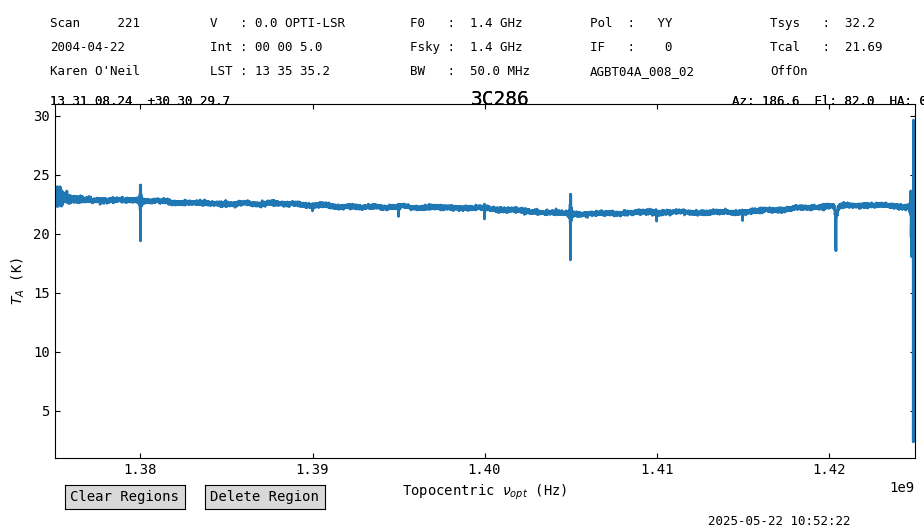

In [31]:
ps0_all.plot()

Since 3C286 is a continuum source, we can see Galactic HI absorption against the continuum.

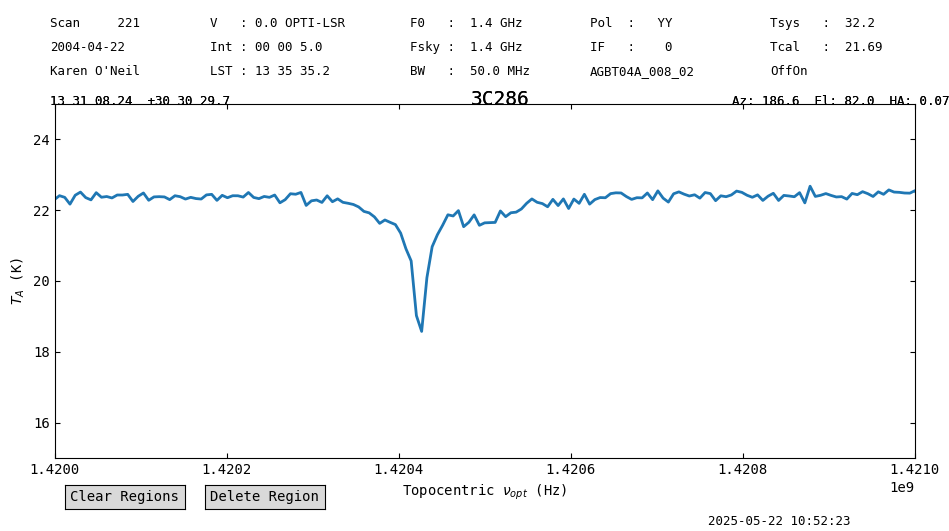

In [32]:
ps0_all.plot(xmin=1.420e9, xmax=1.421e9, ymin=15, ymax=25)

#### Using Selection

We can do the same by using the `selection` method before calling `getps`.

In [33]:
sdfits.select(object="3C286", proc="OffOn")
ps0_all_b = sdfits.getps(plnum=0, ifnum=0, fdnum=0).timeaverage()
ps1_all_b = sdfits.getps(plnum=1, ifnum=0, fdnum=0).timeaverage()
ps_all_b = ps0_all_b.average(ps1_all_b)

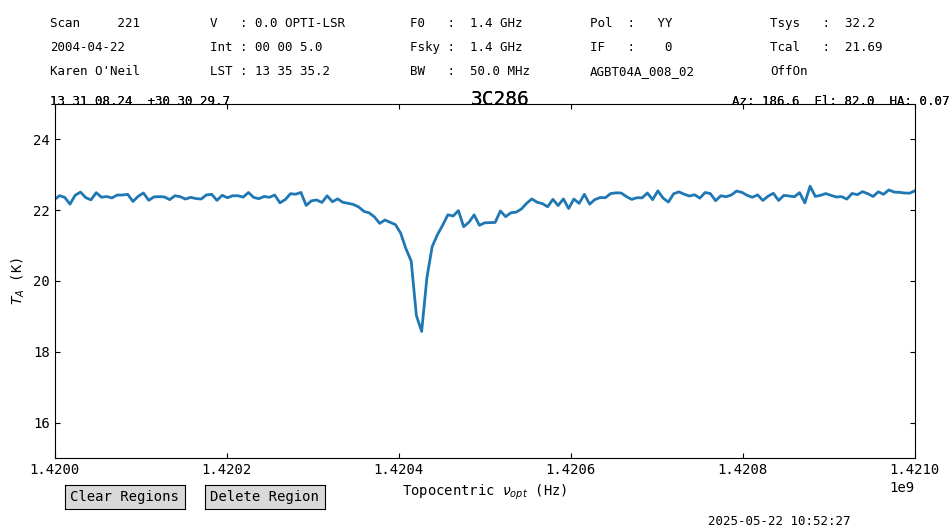

In [34]:
ps0_all_b.plot(xmin=1.420e9, xmax=1.421e9, ymin=15, ymax=25)

Once you are done calibrating, you should clear the selection to have access to all the data again.

In [35]:
sdfits.selection.clear()

### Calibration Without Noise Diodes

Most of the scans in this example did not use the noise diode. In this case we need to provide a value for the system temperature so that the data can be calibrated. For this particular observation, there is one Track observing procedure associated with the OffOn pairs. For these Track observations, the noise diode was fired, so we can use them to figure out the system temperature.

We will work on observations of U11627. For this source the Track scan is 320, and the OffOn pairs are in scans 316, 317, 318 and 319.

First we use `gettp` to figure out the system temperature from the Track scan.

In [36]:
tp0 = sdfits.gettp(scan=320, plnum=0, ifnum=0, fdnum=0).timeaverage()
tp1 = sdfits.gettp(scan=320, plnum=1, ifnum=0, fdnum=0).timeaverage()

The system temperature is stored in the `meta` dictionary of each `Spectrum`.

In [37]:
print(f"System temperature for plnum={tp0.meta['PLNUM']}: {tp0.meta['TSYS']:.2f} K")
print(f"System temperature for plnum={tp1.meta['PLNUM']}: {tp1.meta['TSYS']:.2f} K")

System temperature for plnum=0: 28.05 K
System temperature for plnum=1: 27.65 K


Now we use these values to calibrate the data. The system temperature is provided for the calibration methods through the `t_sys` argument. It is assumed to be in K.

In [38]:
sdfits.select(object="U11627", proc="OffOn")
ps0_wtsys = sdfits.getps(plnum=0, ifnum=0, fdnum=0, object="U11627", t_sys=tp0.meta['TSYS']).timeaverage()
ps1_wtsys = sdfits.getps(plnum=1, ifnum=0, fdnum=0, object="U11627", t_sys=tp1.meta['TSYS']).timeaverage()
ps_wtsys = ps0_wtsys.average(ps1_wtsys)

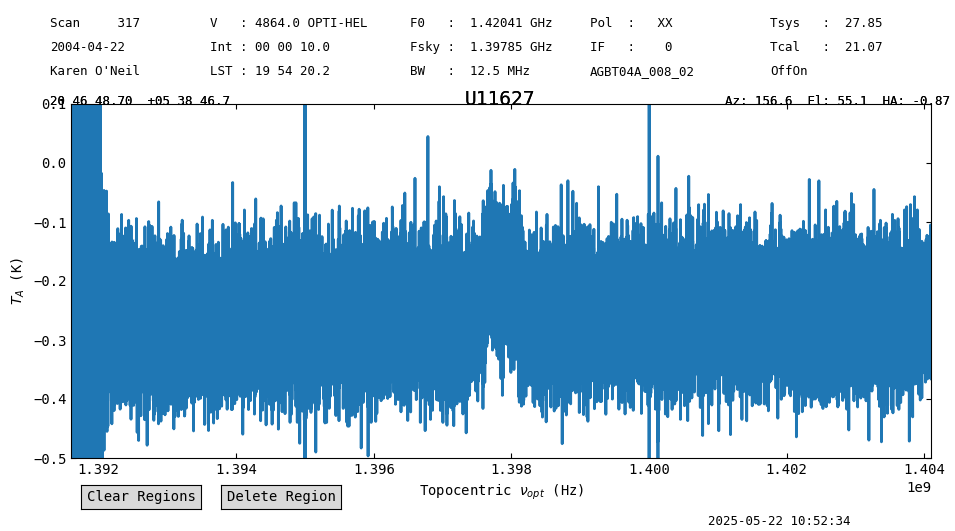

In [39]:
ps_wtsys.plot(ymin=-0.5, ymax=0.1)

Now we smooth and remove a baseline.

In [40]:
ps_wtsys_smo = ps_wtsys.smooth("gauss", 16)
ps_wtsys_smo.baseline(1, model="poly", exclude=[(1*u.GHz,1.393*u.GHz),(1.397*u.GHz,1.399*u.GHz)], remove=True)

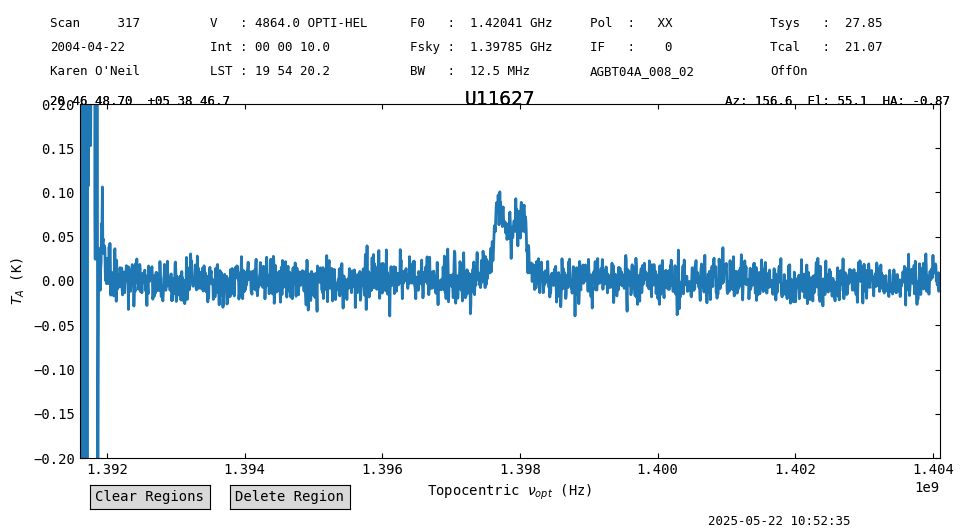

In [41]:
ps_wtsys_smo.plot(ymin=-0.2, ymax=0.2)

In [42]:
sdfits.selection.clear()

### Combining Off Spectra

In some situations we would like to have more flexibility during calibration to specify what will be the Off or reference spectrum used for calibration. In these cases we can use the `GBTFITSLoad.getsigref` function. This function takes as inputs a scan number, or list of them, to be used as On, and a reference spectrum, or scan number (only one in this case). Here we will combine the two Off source spectra from the previous calibration before calibrating the data.

We use `GBTFITSLoad.gettp` to produce the reference spectrum.

In [43]:
tp_ref0 = sdfits.gettp(scan=[316,318], plnum=0, ifnum=0, fdnum=0, t_sys=tp0.meta['TSYS']).timeaverage()
tp_ref1 = sdfits.gettp(scan=[316,318], plnum=1, ifnum=0, fdnum=0, t_sys=tp1.meta['TSYS']).timeaverage()

Now use `GBTFITSLoad.getsigref` to do the calibration. Since we specified the system temperature in the previous call to `gettp`, we do not need to provide it again.

In [44]:
sdfits.select(object="U11627", proc="OffOn")
ps0_wtsys_tpr = sdfits.getsigref(scan=[317,319], ref=tp_ref0, plnum=0, ifnum=0, fdnum=0, object="U11627").timeaverage()
ps1_wtsys_tpr = sdfits.getsigref(scan=[317,319], ref=tp_ref1, plnum=1, ifnum=0, fdnum=0, object="U11627").timeaverage()

Average both polarizations, smooth and remove a baseline like before so we can compare the results.

In [45]:
ps_wtsys_tpr = ps0_wtsys_tpr.average(ps1_wtsys_tpr)
ps_wtsys_tpr_smo = ps_wtsys_tpr.smooth("gauss", 16)
ps_wtsys_tpr_smo.baseline(1, model="poly", exclude=[(1*u.GHz,1.393*u.GHz),(1.397*u.GHz,1.399*u.GHz)], remove=True)

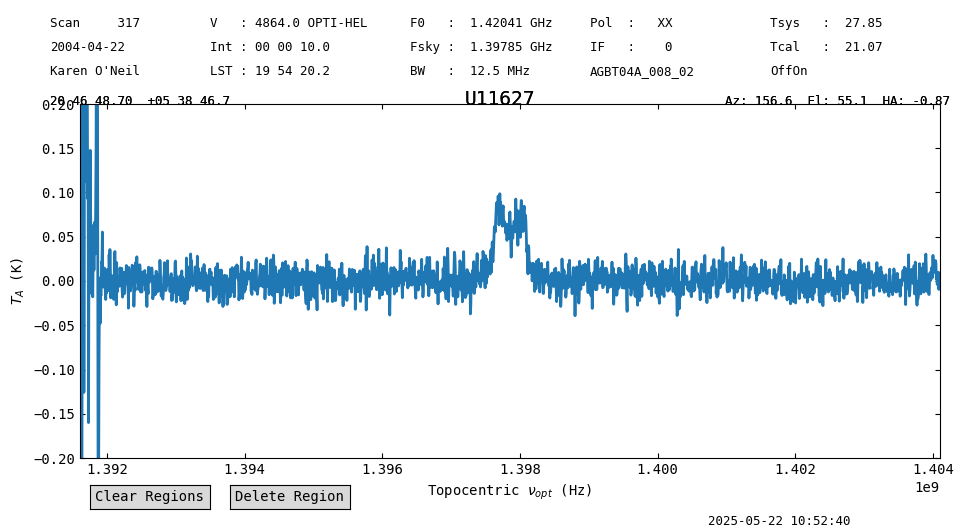

In [46]:
ps_wtsys_tpr_smo.plot(ymin=-0.2, ymax=0.2)

Now compare the noise in the end products.

In [47]:
s = slice(1.393*u.GHz, 1.396*u.GHz)
rms_tpr = ps_wtsys_tpr_smo[s].stats()["rms"]
rms = ps_wtsys_smo[s].stats()["rms"]
print(f"Ratio of rms: {rms_tpr/rms}")

Ratio of rms: 0.9998015335763915


In this case, using a combined reference spectrum improved the noise by an insignificant amount, $\approx0.02\%$.